# Visualize data for 3 species classifiers

Monday, May 21, 2018

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import sys

#Store the relative and absolute path to the home directory of the project
project_directory = '../..'
project_path = os.path.abspath(os.path.join(project_directory))

#Add the project path to the system path if necessesary, to be able to load modules from subdirectories
if project_path not in sys.path:
    sys.path.append(project_path)

In [5]:
import src.image_manager as im
import src.model_eval as meval

## Load the data

In [6]:
train_images_path = os.path.join(project_path, 'data', 'predictions_3species_train_20180518.csv')
test_images_path = os.path.join(project_path, 'data', 'predictions_3species_test_20180518.csv')

In [7]:
train_images = im.load_df(train_images_path)
test_images = im.load_df(test_images_path)

In [8]:
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia,0.178430,0.183531,0.638039,0.077894,0.073958,0.848147,0.072220,0.086408,0.841372
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum,0.385181,0.288694,0.326125,0.523094,0.261840,0.215066,0.640437,0.133107,0.226456
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis,0.092127,0.881363,0.026510,0.008962,0.989278,0.001760,0.057441,0.894977,0.047583
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia,0.283703,0.113394,0.602903,0.254364,0.033022,0.712613,0.150908,0.093110,0.755982
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia,0.161379,0.132803,0.705818,0.096110,0.024797,0.879093,0.093978,0.082140,0.823882


In [9]:
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum,0.548546,0.209120,0.242334,0.750607,0.159810,0.089583,0.511137,0.366253,0.122610
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum,0.313528,0.389070,0.297402,0.352706,0.388136,0.259158,0.278786,0.360384,0.360831
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis,0.167004,0.690549,0.142447,0.177125,0.518942,0.303932,0.143112,0.740831,0.116057
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis,0.169243,0.685277,0.145480,0.065231,0.909061,0.025708,0.094602,0.810644,0.094755
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia,0.159598,0.383001,0.457401,0.107544,0.369944,0.522512,0.164519,0.275061,0.560420


## Manually recreate confusion matrix for gradient booster

Switch the order of the species to match original data.

In [11]:
species = ['Maple', 'Plane', 'Spruce']
gb_confusion = np.array([[69,31, 14], [7,86,10], [7,6,98]])

In [12]:
gb_confusion

array([[69, 31, 14],
       [ 7, 86, 10],
       [ 7,  6, 98]])

Confusion matrix, without normalization
[[69 31 14]
 [ 7 86 10]
 [ 7  6 98]]


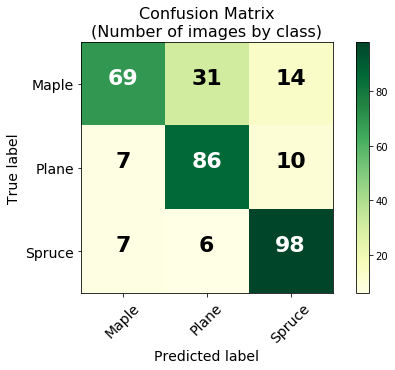

In [18]:
plt.figure(figsize=(7,5))
meval.plot_confusion_matrix(gb_confusion, species, cmap='YlGn', colorbar=True)
plt.savefig(project_path + '/data/confusion_3species.png',bbox_inches="tight")
plt.show()